In [1]:
### IMPORTS ###

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
from bs4 import BeautifulSoup
import json
from pprint import pprint
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
from highlight_text import htext
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from mplsoccer.pitch import Pitch, VerticalPitch

from matplotlib import font_manager
#font_manager.findSystemFonts(fontpaths=None, fontext="ttf")

In [2]:
### URL ###

base_url = 'https://understat.com/player/'
player = '2097'       # Messi
url = base_url + player

In [3]:
### SCRAPE ###

res = requests.get(url)
soup = BeautifulSoup(res.content,'lxml')
scripts = soup.find_all('script')

In [4]:
scripts

[<script>
 			var THEME = localStorage.getItem("theme") || 'DARK';
 			document.body.className = "theme-" + THEME.toLowerCase();
 		</script>,
 <script>
 	var groupsData 		= JSON.parse('\x7B\x22season\x22\x3A\x5B\x7B\x22position\x22\x3A\x22FW\x22,\x22games\x22\x3A\x222\x22,\x22goals\x22\x3A\x222\x22,\x22shots\x22\x3A\x2211\x22,\x22time\x22\x3A\x22180\x22,\x22xG\x22\x3A\x222.2648463547229767\x22,\x22assists\x22\x3A\x221\x22,\x22xA\x22\x3A\x220.9626086056232452\x22,\x22key_passes\x22\x3A\x225\x22,\x22season\x22\x3A\x222022\x22,\x22team\x22\x3A\x22Paris\x20Saint\x20Germain\x22,\x22yellow\x22\x3A\x220\x22,\x22red\x22\x3A\x220\x22,\x22npg\x22\x3A\x222\x22,\x22npxG\x22\x3A\x222.2648463547229767\x22,\x22xGChain\x22\x3A\x223.3384075462818146\x22,\x22xGBuildup\x22\x3A\x220.7948537170886993\x22\x7D,\x7B\x22position\x22\x3A\x22Sub\x22,\x22games\x22\x3A\x2226\x22,\x22goals\x22\x3A\x226\x22,\x22shots\x22\x3A\x2289\x22,\x22time\x22\x3A\x222155\x22,\x22xG\x22\x3A\x229.8803666010499\x22,\x22assists\x2

In [5]:
#get only shots data from scripts, 4th string ([3]) 

strings = scripts[3].string

In [6]:
strings

"\n\tvar shotsData \t= JSON.parse('\\x5B\\x7B\\x22id\\x22\\x3A\\x2232522\\x22,\\x22minute\\x22\\x3A\\x2222\\x22,\\x22result\\x22\\x3A\\x22MissedShots\\x22,\\x22X\\x22\\x3A\\x220.7859999847412109\\x22,\\x22Y\\x22\\x3A\\x220.52\\x22,\\x22xG\\x22\\x3A\\x220.03867039829492569\\x22,\\x22player\\x22\\x3A\\x22Lionel\\x20Messi\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22player_id\\x22\\x3A\\x222097\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222014\\x22,\\x22shotType\\x22\\x3A\\x22LeftFoot\\x22,\\x22match_id\\x22\\x3A\\x225831\\x22,\\x22h_team\\x22\\x3A\\x22Barcelona\\x22,\\x22a_team\\x22\\x3A\\x22Elche\\x22,\\x22h_goals\\x22\\x3A\\x223\\x22,\\x22a_goals\\x22\\x3A\\x220\\x22,\\x22date\\x22\\x3A\\x222014\\x2D08\\x2D24\\x2020\\x3A00\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Rafinha\\x22,\\x22lastAction\\x22\\x3A\\x22Pass\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x2232525\\x22,\\x22minute\\x22\\x3A\\x2241\\x22,\\x22result\\x22\\x3A\\x22Goal\\x22,\\x22X\\x22\\x3A\\x220.8619999

In [7]:
#strip symbols, make json

ind_start = strings.index("('")+2
ind_end = strings.index("')")

json_data = strings[ind_start:ind_end]
json_data = json_data.encode('utf8)').decode('unicode_escape')

data = json.loads(json_data)

In [8]:
data

[{'id': '32522',
  'minute': '22',
  'result': 'MissedShots',
  'X': '0.7859999847412109',
  'Y': '0.52',
  'xG': '0.03867039829492569',
  'player': 'Lionel Messi',
  'h_a': 'h',
  'player_id': '2097',
  'situation': 'OpenPlay',
  'season': '2014',
  'shotType': 'LeftFoot',
  'match_id': '5831',
  'h_team': 'Barcelona',
  'a_team': 'Elche',
  'h_goals': '3',
  'a_goals': '0',
  'date': '2014-08-24 20:00:00',
  'player_assisted': 'Rafinha',
  'lastAction': 'Pass'},
 {'id': '32525',
  'minute': '41',
  'result': 'Goal',
  'X': '0.8619999694824219',
  'Y': '0.615',
  'xG': '0.06870150566101074',
  'player': 'Lionel Messi',
  'h_a': 'h',
  'player_id': '2097',
  'situation': 'OpenPlay',
  'season': '2014',
  'shotType': 'LeftFoot',
  'match_id': '5831',
  'h_team': 'Barcelona',
  'a_team': 'Elche',
  'h_goals': '3',
  'a_goals': '0',
  'date': '2014-08-24 20:00:00',
  'player_assisted': 'Sergio Busquets',
  'lastAction': 'BallRecovery'},
 {'id': '32529',
  'minute': '62',
  'result': 'Goal

In [9]:
print(len(data))

1344


102


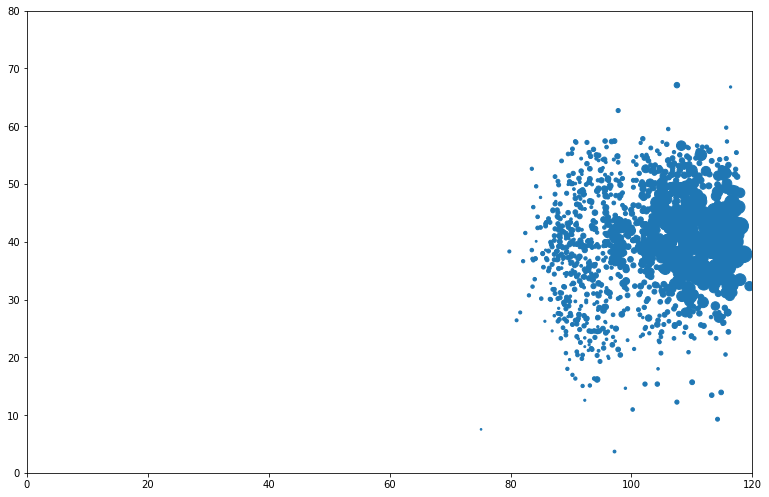

In [10]:
### DATA CLEANING ###

X = []
Y = []
xG = []
situation = []
shotType = []
h_a = []
h_team = []
a_team = []
date = []
result = []
player = []


for index in range(len(data)):
    for key in data[index]:
        if key == 'X':
            X.append(data[index][key])
        if key == 'Y':
            Y.append(data[index][key])
        if key == 'situation':
            situation.append(data[index][key])
        if key == 'shotType':
            shotType.append(data[index][key])
        if key == 'h_team':
            h_team.append(data[index][key])
        if key == 'a_team':
            a_team.append(data[index][key])
        if key == 'xG':
            xG.append(data[index][key])
        if key == 'player':
            player.append(data[index][key])
        if key == 'result':
            result.append(data[index][key])
        if key == 'h_a':
            h_a.append(data[index][key])
            


col_names = ['X','Y','result','xG','situation','shotType','h_team','a_team','h_a']
df = pd.DataFrame([X,Y,result,xG,situation,shotType,h_team,a_team,h_a],index=col_names)
df = df.T

convert_dict = {'X': float,
                'Y': float,
                'xG': float,
                }

df = df.astype(convert_dict)
df = df
#print(df.dtypes)

fig, ax = plt.subplots(figsize=(13,8.5))

#pitch = Pitch(pitch_type='statsbomb')

ax.scatter(df['X']*120,df['Y']*80,s=df['xG']*300)
plt.ylim(0,80)
plt.xlim(0,120)


df_fk = df.loc[df['situation']=='DirectFreekick']
fk_saved = len(df_fk.loc[df['result'] == 'SavedShot'])
fk_goals = len(df_fk.loc[df['result'] == 'Goal'])
fk_OnTarget = fk_saved + fk_goals
df_fk_goals = df_fk.loc[df['result']=='Goal']
xG_cum = df_fk['xG'].cumsum()
xG_tot = xG_cum.iat[-1]
xG_tot = round(xG_tot, 2)

print(fk_OnTarget)

In [11]:
print(df_fk)

          X      Y       result        xG       situation  shotType  \
4     0.869  0.192    SavedShot  0.065317  DirectFreekick  LeftFoot   
5     0.723  0.494    SavedShot  0.054805  DirectFreekick  LeftFoot   
16    0.762  0.310  MissedShots  0.056991  DirectFreekick  LeftFoot   
23    0.766  0.612  MissedShots  0.075770  DirectFreekick  LeftFoot   
39    0.768  0.318  BlockedShot  0.061872  DirectFreekick  LeftFoot   
...     ...    ...          ...       ...             ...       ...   
1310  0.787  0.336  MissedShots  0.073074  DirectFreekick  LeftFoot   
1313  0.744  0.605    SavedShot  0.056226  DirectFreekick  LeftFoot   
1315  0.727  0.503    SavedShot  0.052377  DirectFreekick  LeftFoot   
1334  0.763  0.500  BlockedShot  0.079704  DirectFreekick  LeftFoot   
1339  0.721  0.376    SavedShot  0.042859  DirectFreekick  LeftFoot   

                   h_team               a_team h_a  
4              Villarreal            Barcelona   a  
5              Villarreal            Barc

Text(0.31, 0.19, '6.859999999999999+')

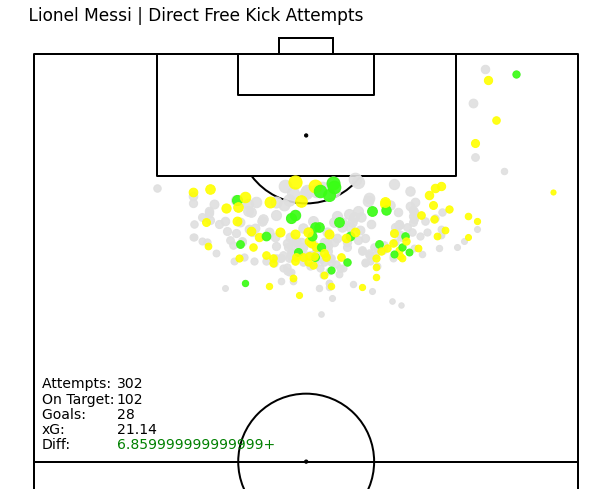

In [21]:
#### PLOTTING #####


fig, ax = plt.subplots(figsize=(13,8.5))

#fig.set_facecolor('#22312b')
#ax.patch.set_facecolor('#22312b')
#plt.ylim(5,80)
#plt.xlim(0,120)

pitch = pitch = VerticalPitch(half=True,goal_type='box',line_color='black')
pitch.draw(ax=ax)
#plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

ax.set_title('    Lionel Messi | Direct Free Kick Attempts',fontsize=17,loc="left")

for x in range(len(df['X'])):
        if df['situation'][x] == 'DirectFreekick':
            if df['result'][x] == 'Goal': 
                plt.scatter(df['Y'][x]*79,df['X'][x]*123, color = '#39FF14',s=df['xG'][x]*1000,zorder=2,alpha=.9,label="Goal")
            if df['result'][x] == 'SavedShot':
                plt.scatter(df['Y'][x]*79,df['X'][x]*123, color = '#FFFF00',s=df['xG'][x]*1000,zorder=2,alpha=.9,label="Saved")
            else:
                plt.scatter(df['Y'][x]*79,df['X'][x]*123, color = '#DFDFDF',s=df['xG'][x]*1000,zorder=1,alpha=.9, label="Off Target")
            

              
fig.text(0.23,0.29,"Attempts: ",fontsize=14)
fig.text(0.31,0.29,str(len(df_fk)),fontsize=14)
fig.text(0.23,0.265,"On Target: ",fontsize=14)
fig.text(0.31,0.265,str(fk_OnTarget),fontsize=14)
fig.text(0.23,0.24,"Goals: ",fontsize=14)
fig.text(0.31,0.24,str(fk_goals),fontsize=14)
fig.text(0.23,0.215,"xG:",fontsize=14)
fig.text(0.31,0.215,str(xG_tot),fontsize=14)
fig.text(0.23,0.19,"Diff:",fontsize=14)
fig.text(0.31,0.19,str(fk_goals-xG_tot)+'+',fontsize=14, color='green')



#ax.legend()

/opt/anaconda3/envs/f1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


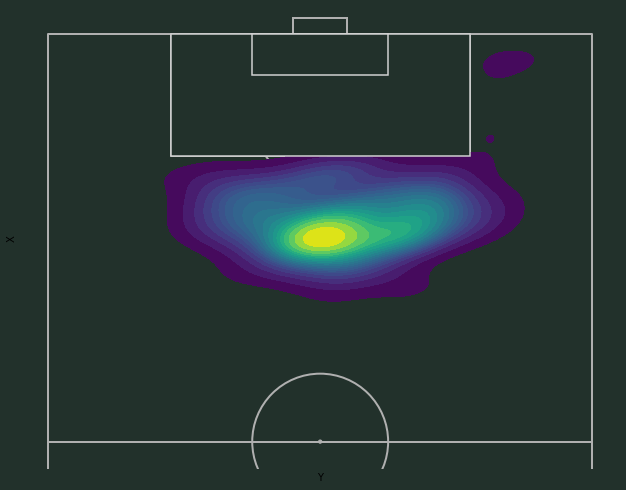

In [14]:
fig, ax = plt.subplots(figsize=(13,8.5))




kde = sns.kdeplot(
    df_fk['Y']*79,
    df_fk['X']*122,
    fill=True,
    shade_lowest=False,
    alpha=1,
    n_levels=20,
    cmap='viridis'
)


pitch = VerticalPitch(half=True, goal_type='box')
pitch.draw(ax=ax)
#plt.gca().invert_yaxis()
plt.gca().invert_xaxis()


## Opaque box for freelkick heatmap
box_18 = patches.Rectangle((18, 102), 44, 18, linewidth=1.5, edgecolor='lightgrey', facecolor='#22312b')
box_6 = patches.Rectangle((30, 114), 20, 6, linewidth=1.5, edgecolor='lightgrey', facecolor='#22312b')
ax.add_patch(box_18)
ax.add_patch(box_6)

fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#plt.scatter(df_fk['X'],df_fk['Y'])

            

              

/opt/anaconda3/envs/f1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


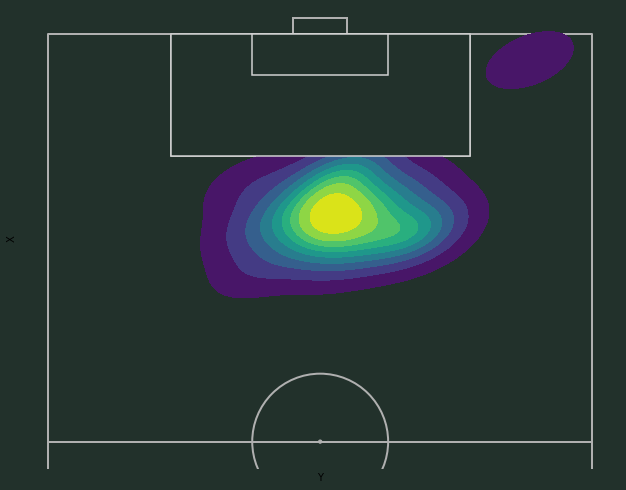

In [15]:
fig, ax = plt.subplots(figsize=(13,8.5))

#fig.set_facecolor('#22312b')
#ax.patch.set_facecolor('#22312b')
#plt.ylim(5,80)
#plt.xlim(0,120)


kde = sns.kdeplot(
    df_fk_goals['Y']*79,
    df_fk_goals['X']*122,
    fill=True,
    shade_lowest=False,
    alpha=1,
    n_levels=10,
    cmap='viridis'
)



pitch = pitch = VerticalPitch(half=True, goal_type='box')
pitch.draw(ax=ax)
#plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

box_18 = patches.Rectangle((18, 102), 44, 18, linewidth=1.5, edgecolor='lightgrey', facecolor='#22312b')
box_6 = patches.Rectangle((30, 114), 20, 6, linewidth=1.5, edgecolor='lightgrey', facecolor='#22312b')
ax.add_patch(box_18)
ax.add_patch(box_6)

fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')


Text(0.5, 0.5, 'heat_b')

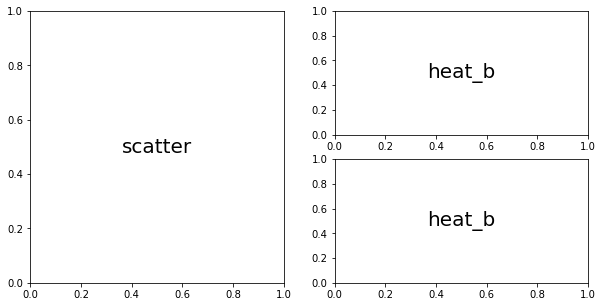

In [16]:
layout = [["scatter", "heat_a"],
          ["scatter", "heat_b"]]

fig = plt.figure(figsize = (10,5))

ax_dict = fig.subplot_mosaic(
    layout
)

ax_dict["scatter"].annotate(
    xy = (.5,.5),
    text = "scatter",
    ha = "center",
    va = "center",
    size = 20
)

ax_dict["heat_a"].annotate(
    xy = (.5,.5),
    text = "heat_b",
    ha = "center",
    va = "center",
    size = 20
)

ax_dict["heat_b"].annotate(
    xy = (.5,.5),
    text = "heat_b",
    ha = "center",
    va = "center",
    size = 20
)

/opt/anaconda3/envs/f1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


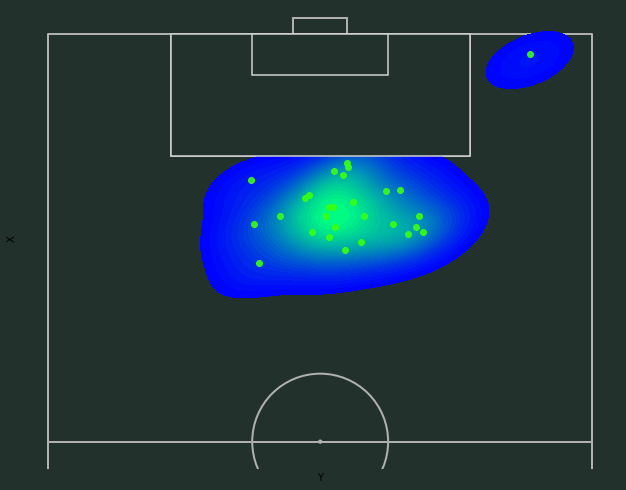

In [17]:
fig, ax = plt.subplots(figsize=(13,8.5))

#fig.set_facecolor('#22312b')
#ax.patch.set_facecolor('#22312b')
#plt.ylim(5,80)
#plt.xlim(0,120)


kde2 = sns.kdeplot(
    df_fk_goals['Y']*79,
    df_fk_goals['X']*122,
    fill=True,
    shade_lowest=False,
    alpha=1,
    n_levels=30,
    cmap='winter',

)

for x in range(len(df['X'])):
        if df['situation'][x] == 'DirectFreekick':
            if df['result'][x] == 'Goal': 
                plt.scatter(df['Y'][x]*79,df['X'][x]*123, color = '#39FF14',zorder=2,alpha=.9,label="Goal")

pitch = pitch = VerticalPitch(half=True, goal_type='box')
pitch.draw(ax=ax)
#plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

box_18 = patches.Rectangle((18, 102), 44, 18, linewidth=1.5, edgecolor='lightgrey', facecolor='#22312b')
box_6 = patches.Rectangle((30, 114), 20, 6, linewidth=1.5, edgecolor='lightgrey', facecolor='#22312b')
ax.add_patch(box_18)
ax.add_patch(box_6)

fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

/opt/anaconda3/envs/f1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


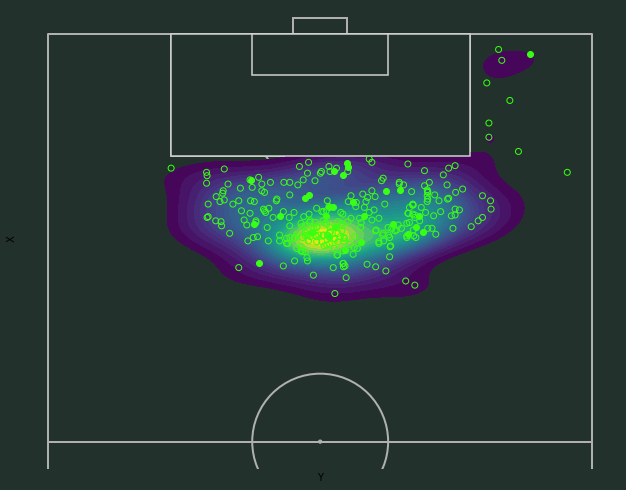

In [18]:
fig, ax = plt.subplots(figsize=(13,8.5))




kde = sns.kdeplot(
    df_fk['Y']*79,
    df_fk['X']*122,
    fill=True,
    shade_lowest=False,
    alpha=1,
    n_levels=30,
    cmap='viridis'
)

            
for x in range(len(df['X'])):
        if df['situation'][x] == 'DirectFreekick':
            if df['result'][x] == 'Goal': 
                plt.scatter(df['Y'][x]*79,df['X'][x]*123, color = '#39FF14',zorder=2,alpha=1)
            else:
                plt.scatter(df['Y'][x]*79,df['X'][x]*123, color = 'none', edgecolor= '#39FF14',zorder=2,alpha=1)

pitch = VerticalPitch(half=True, goal_type='box')
pitch.draw(ax=ax)
#plt.gca().invert_yaxis()
plt.gca().invert_xaxis()


## Opaque box for freelkick heatmap
box_18 = patches.Rectangle((18, 102), 44, 18, linewidth=1.5, edgecolor='lightgrey', facecolor='#22312b')
box_6 = patches.Rectangle((30, 114), 20, 6, linewidth=1.5, edgecolor='lightgrey', facecolor='#22312b')
ax.add_patch(box_18)
ax.add_patch(box_6)

fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

